In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://csuw.net/misc/admission.csv')
df

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  Chance of Admit  
0           1             0.92  
1           1             0.76  
2           1             0.72  
3           1             0.80  
4           0             0.65  
..        ...              ...  
495         1             0.87  
496         1             0.96  
497         1             0.93  
498         0             0.73  
499         0             0.84  

[500 rows x 9 columns]

array([[<AxesSubplot:xlabel='Serial No.', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='GRE Score', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='TOEFL Score', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='University Rating', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='SOP', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='LOR ', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='CGPA', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='Research', ylabel='Serial No.'>,
        <AxesSubplot:xlabel='Chance of Admit', ylabel='Serial No.'>],
       [<AxesSubplot:xlabel='Serial No.', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='GRE Score', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='TOEFL Score', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='University Rating', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='SOP', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='LOR ', ylabel='GRE Score'>,
        <AxesSubplot:xlabel='CGPA', ylabel='GRE Score'>,
   

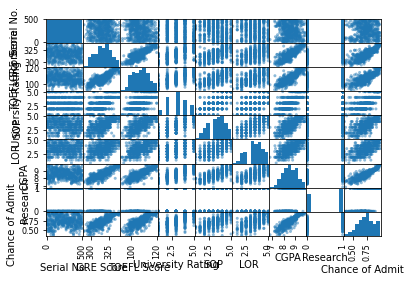

In [2]:
%matplotlib inline
from pandas.plotting import scatter_matrix

scatter_matrix(df)

<AxesSubplot:>

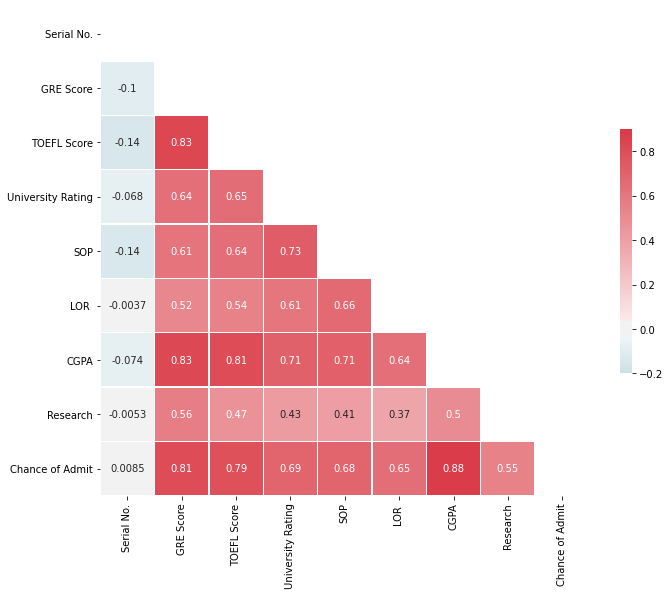

In [3]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sb.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr,  annot=True, mask=mask, cmap=cmap, vmin=-0.2, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [4]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
X = df[ ['CGPA'] ]

y = df['Chance of Admit']

display(X)
display(y)

CGPA
0    9.65
1    8.87
2    8.00
3    8.67
4    8.21
..    ...
495  9.02
496  9.87
497  9.56
498  8.43
499  9.04

[500 rows x 1 columns]

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

display(X_train)
display(X_test)

CGPA
107  9.46
336  8.79
71   9.76
474  7.95
6    8.20
..    ...
323  8.18
192  8.94
117  7.46
47   9.70
172  9.13

[400 rows x 1 columns]

CGPA
90   7.92
254  9.12
283  8.90
445  9.08
461  8.13
..    ...
372  9.62
56   7.40
440  7.79
60   8.10
208  8.16

[100 rows x 1 columns]

In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

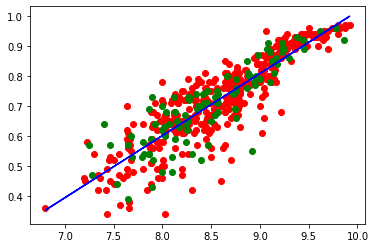

In [9]:

plt.plot(X_train, model.predict(X_train), color='blue')

plt.scatter(X_train, y_train, color='red')

plt.scatter(X_test, y_test, color='green')

plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, model.predict(X_test))